## Dinosaur v Dragon Classification

In [1]:
# import libaries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

2022-11-21 19:09:15.647114: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
path = './dino-dragon/train/dragon'
name = '3a8bf055-784e-410e-ace9-1ad329066a81.jpg'
fullname = f'{path}/{name}'
fullname

'./dino-dragon/train/dragon/3a8bf055-784e-410e-ace9-1ad329066a81.jpg'

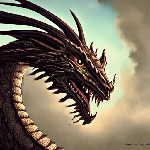

In [3]:
img = load_img(fullname,target_size = (150,150))
img

In [4]:
x = np.array(img)
x.shape

(150, 150, 3)

**Using CNNs**

In [5]:
input_shape = x.shape
input_shape

(150, 150, 3)

In [6]:
def make_model(input_size=150,):
    """
    Build Model
    """
    model = tf.keras.models.Sequential()
    model.add(keras.Input(shape=(input_size, input_size, 3)))
    model.add(keras.layers.Conv2D(32, (3, 3), activation ='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(1, activation='softmax'))
    
    optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False) # because we have already set softmax in the output layer
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

The best loss function here is **BinaryCrossentropy**

In [7]:
model = make_model()

2022-11-21 19:09:25.615093: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 19:09:25.689657: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 19:09:25.690289: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 19:09:25.692674: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

The total number of trainable parameters is: **11,215,873**

In [42]:
image_gen = ImageDataGenerator(
    rescale=1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
)

In [43]:
train_ds = image_gen.flow_from_directory(
    './dino-dragon/train',
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

Found 1594 images belonging to 2 classes.


In [44]:
train_ds.class_indices

{'dino': 0, 'dragon': 1}

In [45]:
X, y = next(train_ds)

In [46]:
X.shape

(20, 256, 256, 3)

In [47]:
y.shape

(20,)

In [48]:
test_ds = image_gen.flow_from_directory(
    './dino-dragon/test', 
    batch_size=20,
    shuffle=True,
    class_mode='binary'

)

Found 394 images belonging to 2 classes.


In [49]:
X.shape

(20, 256, 256, 3)

In [50]:
input_size = 256
model = make_model(
    input_size=input_size,
)

In [51]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
80/80 [==============================] - 10s 121ms/step - loss: 0.5109 - accuracy: 0.4812 - val_loss: 0.4143 - val_accuracy: 0.5025
Epoch 2/10
80/80 [==============================] - 10s 120ms/step - loss: 0.3641 - accuracy: 0.4812 - val_loss: 0.3251 - val_accuracy: 0.5025
Epoch 3/10
80/80 [==============================] - 9s 118ms/step - loss: 0.2853 - accuracy: 0.4812 - val_loss: 0.2800 - val_accuracy: 0.5025
Epoch 4/10
80/80 [==============================] - 9s 117ms/step - loss: 0.2657 - accuracy: 0.4812 - val_loss: 0.2749 - val_accuracy: 0.5025
Epoch 5/10
80/80 [==============================] - 9s 118ms/step - loss: 0.2020 - accuracy: 0.4812 - val_loss: 0.2939 - val_accuracy: 0.5025
Epoch 6/10
80/80 [==============================] - 9s 118ms/step - loss: 0.1645 - accuracy: 0.4812 - val_loss: 0.2382 - val_accuracy: 0.5025
Epoch 7/10
80/80 [==============================] - 10s 119ms/step - loss: 0.1288 - accuracy: 0.4812 - val_loss: 0.3333 - val_accuracy: 0.5025
Epo

In [52]:
history.history

{'loss': [0.510931670665741,
  0.3640907406806946,
  0.28528136014938354,
  0.26571014523506165,
  0.20201325416564941,
  0.1644940972328186,
  0.12875373661518097,
  0.09360463172197342,
  0.08077405393123627,
  0.055900540202856064],
 'accuracy': [0.481179416179657,
  0.481179416179657,
  0.481179416179657,
  0.481179416179657,
  0.481179416179657,
  0.481179416179657,
  0.481179416179657,
  0.481179416179657,
  0.481179416179657,
  0.481179416179657],
 'val_loss': [0.41428279876708984,
  0.32509997487068176,
  0.28003430366516113,
  0.2749435603618622,
  0.29389652609825134,
  0.23820029199123383,
  0.3332647681236267,
  0.2861604392528534,
  0.23569001257419586,
  0.26934725046157837],
 'val_accuracy': [0.5025380849838257,
  0.5025380849838257,
  0.5025380849838257,
  0.5025380849838257,
  0.5025380849838257,
  0.5025380849838257,
  0.5025380849838257,
  0.5025380849838257,
  0.5025380849838257,
  0.5025380849838257]}

In [53]:
np.median(history.history['accuracy'])

0.481179416179657

The median of training accuracy is **0.48**

In [55]:
np.std(history.history['loss'])

0.13621246175932658

The std of training loss is **0.13**

In [56]:
image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [57]:
train_ds = image_gen.flow_from_directory(
    './dino-dragon/train',
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

test_ds = image_gen.flow_from_directory(
    './dino-dragon/test', 
    batch_size=20,
    shuffle=True,
    class_mode='binary'

)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [58]:
hist = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
80/80 [==============================] - 32s 405ms/step - loss: 0.3888 - accuracy: 0.4812 - val_loss: 0.3443 - val_accuracy: 0.5025
Epoch 2/10
80/80 [==============================] - 32s 403ms/step - loss: 0.3840 - accuracy: 0.4812 - val_loss: 0.3300 - val_accuracy: 0.5025
Epoch 3/10
80/80 [==============================] - 32s 402ms/step - loss: 0.3696 - accuracy: 0.4812 - val_loss: 0.3352 - val_accuracy: 0.5025
Epoch 4/10
80/80 [==============================] - 32s 404ms/step - loss: 0.3571 - accuracy: 0.4812 - val_loss: 0.3032 - val_accuracy: 0.5025
Epoch 5/10
80/80 [==============================] - 33s 407ms/step - loss: 0.3731 - accuracy: 0.4812 - val_loss: 0.2923 - val_accuracy: 0.5025
Epoch 6/10
80/80 [==============================] - 32s 403ms/step - loss: 0.3572 - accuracy: 0.4812 - val_loss: 0.3456 - val_accuracy: 0.5025
Epoch 7/10
80/80 [==============================] - 32s 406ms/step - loss: 0.3174 - accuracy: 0.4812 - val_loss: 0.4223 - val_accuracy: 0.5025

In [61]:
np.mean(hist.history['val_loss'])

0.32834866642951965

Mean of loss is **0.32**

In [65]:
np.mean(hist.history['val_accuracy'][5:10])

0.5025380849838257

Mean of accuracy is **0.50**